In [1]:
# Pendefinisian data dummy

import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X, y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

In [2]:
# Melakukan perubahan nilai dari make classification menjadi nilai diskrit

# Melakukan absolute nilai
X = np.abs(X)

# Membulatkan nilai 2 angka di belakang koma dan menghilangkan koma dengan dikali 100
X = np.round(X, 2) * 100

# Melakukan pengubahan dalam bentuk int
X = X.astype(int)
print(X)
print(y)

[[220 119]
 [118 250]
 [ 95 206]
 [ 78 246]
 [ 49 208]
 [118  64]
 [112 140]
 [184 227]
 [180  66]
 [127 103]
 [ 74  36]
 [118  23]
 [ 74  21]
 [196 155]
 [127  93]
 [158 148]
 [ 30  34]
 [ 67  64]
 [ 47  42]
 [ 70  75]
 [ 64  67]
 [139 143]
 [ 70  62]
 [ 96 102]
 [ 45 178]
 [152  96]
 [ 37 215]
 [127 162]
 [171  34]
 [ 31 193]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [3]:
import pandas as pd

# Membuat dataframe

# Melakukan rehsape pada data y menjadi 2D

y_new = y.reshape(-1, 1)

# Melakukan penggabungan fitur x dan label y
data = np.concatenate((X, y_new), axis=1)

# Melakukan pendefinisian nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Membuat dataframe
df = pd.DataFrame(data, columns=nama_kolom)

# Menampilkan dataframe
df.head()

,Fitur 1,Fitur 2,Label
0,220,119,0
1,118,250,0
2,95,206,0
3,78,246,0
4,49,208,0


In [4]:
# Mengubah data label menjadi kelas a dan b

labels = {
    1: 'Kelas A',
    0: 'Kelas B'
}

# Melakukan copy data frame menjadi df baru
df_new = df.copy()

# Mengubah label pada df baru menjadi label yang baru
df_new['Label'] = df_new['Label'].map(labels)

# Menampilkan df yang baru
df_new.head()

,Fitur 1,Fitur 2,Label
0,220,119,Kelas B
1,118,250,Kelas B
2,95,206,Kelas B
3,78,246,Kelas B
4,49,208,Kelas B


/tmp/ipykernel_84376/3849448461.py:13: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipykernel_84376/3849448461.py:14: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


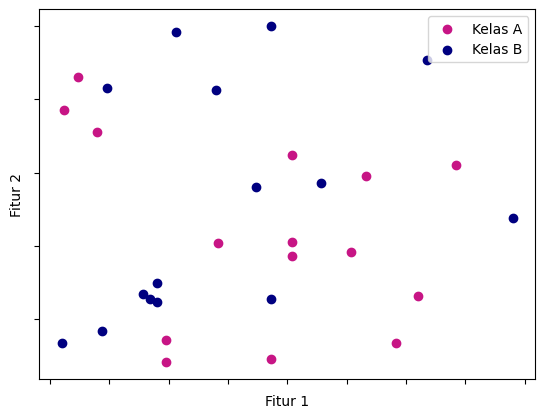

In [5]:
# Melakukan visualisasi data

import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_new.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [6]:
# Melakukan klasifikasi dengan metode multinomial naive bayes

from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.6666666666666666


In [7]:
# Melakukan klasifikasi dengan metode gaussian naive bayes

from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.5555555555555556
